# Predict Mileage mpg using other variable
### mpg is Target Veriable
### Predictor vefiables hp, wt( continuous variables)
### using linear Regression Algorithm

In [1]:
# import the useful liberary

import pandas as pd
import seaborn as sb
#import sklearn as sl
#import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats


In [2]:
cars = pd.read_csv('mtcars.csv')
print(cars.shape)
cars.head()

(32, 12)


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


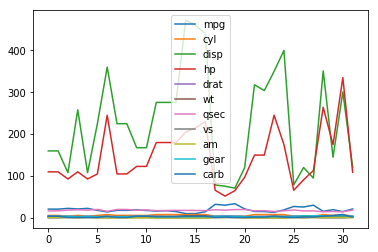

In [3]:
cars.plot()

In [4]:
#Checking the assumption of Linear Reg. 1) Linearity of the Predictor Variables with Target
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.854553,-0.848323,-0.748338,0.664093,-0.876525,0.362559,0.610570,0.658809,0.480045,-0.510205
cyl,-0.854553,1.000000,0.904855,0.821048,-0.639699,0.828594,-0.513701,-0.773405,-0.621461,-0.453460,0.554153
disp,-0.848323,0.904855,1.000000,0.784517,-0.650057,0.909787,-0.389220,-0.676439,-0.640002,-0.520970,0.415707
hp,-0.748338,0.821048,0.784517,1.000000,-0.352187,0.666635,-0.732310,-0.717553,-0.283276,-0.061141,0.772405
drat,0.664093,-0.639699,-0.650057,-0.352187,1.000000,-0.693334,-0.117535,0.279943,0.763135,0.710735,-0.000400
wt,-0.876525,0.828594,0.909787,0.666635,-0.693334,1.000000,-0.170668,-0.547939,-0.718505,-0.588810,0.418441
qsec,0.362559,-0.513701,-0.389220,-0.732310,-0.117535,-0.170668,1.000000,0.772373,-0.207698,-0.392472,-0.756134
vs,0.610570,-0.773405,-0.676439,-0.717553,0.279943,-0.547939,0.772373,1.000000,0.181463,0.098709,-0.632025
am,0.658809,-0.621461,-0.640002,-0.283276,0.763135,-0.718505,-0.207698,0.181463,1.000000,0.842662,0.035518
gear,0.480045,-0.453460,-0.520970,-0.061141,0.710735,-0.588810,-0.392472,0.098709,0.842662,1.000000,0.305056


Range of Skewness , s < |1.96|
skewness of hp:  0.8824486686403539
skewness of wt:  0.45340839946604955
kurtosis of hp:  0.2164779989409764
kurtosis of wt:  0.04845108327092662


C:\Users\rakchh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


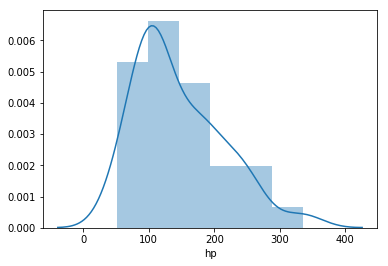

In [5]:
# Checking assumptions of the Liner Reg 
# 1) Normality , we shall normality Univariate , multivarient is assumed with higher dimention
%matplotlib inline
sb.distplot(cars.hp)
#sb.distplot(cars.wt)

print("Range of Skewness , s < |1.96|")
print('skewness of hp: ',stats.skew(cars.hp))
print('skewness of wt: ',stats.skew(cars.wt))

print('kurtosis of hp: ',stats.kurtosis(cars.hp))
print('kurtosis of wt: ',stats.kurtosis(cars.wt))

# both hp and wt passing the normality test , they are normal values

### Get X and y data

In [6]:
X = cars.loc[: , ['hp','wt','am']]
y = cars.mpg # cars.loc[: , ['mpg']]

### devide dataset in traing 70% and testing 30% 

In [7]:
# train_test_split(X, y, test_size = size_need_to_take_for_testData, random_state = count_for_rendon_value)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 12)

In [8]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (27, 3)
X_test shape:  (5, 3)
y_train shape:  (27,)
y_test shape:  (5,)


In [9]:
model_lr = LinearRegression()

In [10]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_predict = model_lr.predict(X_test)

In [12]:
print(y_predict)

[19.33398298 15.86828688 28.919131   11.32111404 23.72398656]


In [13]:
# score for the y_test and the y_predict values
# Score must be more than 85 %, else we need to Optimize the Linear Regression

r2_score(y_test,y_predict)

0.887616095052099

In [14]:
y_test

7     18.1
24    19.2
18    30.4
14    10.4
1     21.0
Name: mpg, dtype: float64

In [15]:
y_predict

array([19.33398298, 15.86828688, 28.919131  , 11.32111404, 23.72398656])

### Optimize Linear Regression
##### check for missing values in all X fields(x1 ,x2, x3, ...)
##### check for outliers for all X fields (x1, x2, x3, ....)
##### Here we are looking r2_score > 90% , so are doing same process again 
##### Find the outlier and remove those values, as outliear makes our model not predictable properly (means < 90%) 

# check for null values. if any value find, just replace with mean 

In [43]:
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

### Outlier Analysis

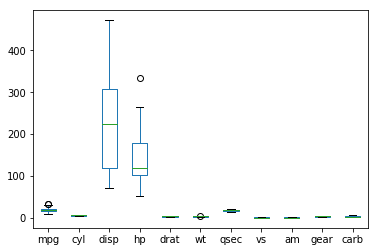

In [35]:
cars.plot(kind='box')
#cars.hp.plot(kind='box')

# we can see the outlier in the graph, we must remove that row from dataset.

In [31]:
# find the outliear value/ row

cars[cars.hp == cars.hp.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [29]:
# remove the outlier and and create a new dataset

cars_hp_outliers_removed = cars.drop(index=30)

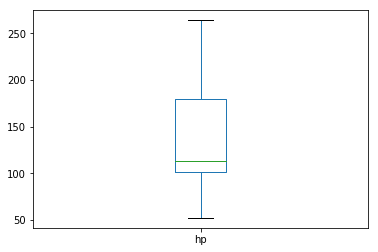

In [32]:
cars_hp_outliers_removed.hp.plot(kind='box')

# now we dont see anyb outlier in the graph.

In [19]:
cars_hp_outliers_removed

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
8,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Again run the code to create treained annd test data
### Trained Model 
### Again get y_predict

In [45]:
X = cars_hp_outliers_removed.loc[: , ['hp','wt','am']]
y = cars_hp_outliers_removed.mpg      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 12)

# normalize=True , use this to normalize the data for every variable
model_lr = LinearRegression(normalize=True)
model_lr.fit(X_train, y_train)

y_predict = model_lr.predict(X_test)

# score for the y_test and the y_predict values
# Score must be more than 85 %, else we need to Optimize the Linear Regression
# herer we are looking score > 90%  

r2_score(y_test,y_predict)

0.9453115012978971

### r2_score is > 90%, its good to use trained model with real values
### Now predict any value using trained model by passing inputs


In [33]:
y_test

7     18.1
23    13.3
18    30.4
14    10.4
1     21.0
Name: mpg, dtype: float64

In [34]:
y_predict

array([19.71524395, 13.30197561, 28.96521929, 11.52492385, 23.68764865])

In [49]:
model_lr.predict([[250,2.0,0]])

# so for the input of 
# hp = 250, weigt = 2.0 tan, am = 0
# milage will be = 17.4

array([17.47858869])

# Can check more for Outliers, for more exact result
### we can check for other fiels also 

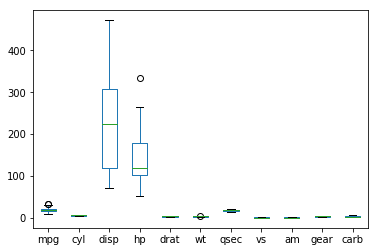

In [46]:
cars.plot(kind='box')

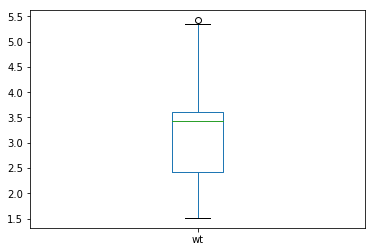

In [37]:
cars.wt.plot(kind='box')